# 最適化手法レポート

**めも： toolsに投げ込む**

## 目的関数

In [438]:
import numpy as np

def f(x):
    """xは[2,1]のndarray型"""
    return 100*(x[1]-x[0]**2)**2 + (1-x[0])**2

## 図に起こす

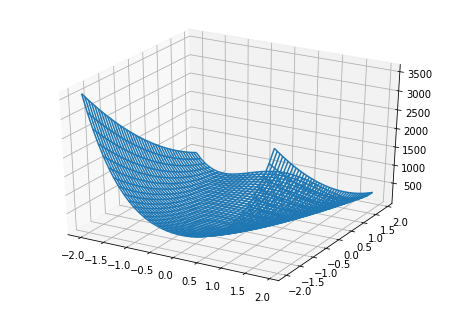

In [312]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

def main():
    x0 = np.arange(-2, 2, 0.1)
    x1 = np.arange(-2, 2, 0.1)
    X0, X1 = np.meshgrid(x0, x1)
    Y = 100*(X1-X0**2)**2 + (1-X0)**2

    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_wireframe(X0, X1, Y)

    plt.show()


if __name__ == '__main__':
    main()

## 最急降下法

### 数値微分・偏微分・勾配ベクトルをする

In [154]:
def numerical_diff(f, x, i):
    """中央差分を元に数値微分する関数 (偏微分)

    :param function f: 偏微分する関数
    :param numpy.ndarray x: 偏微分する引数
    :param int i: 偏微分する変数のインデックス
    """
    # 丸め誤差で無視されない程度に小さな値を用意する
    h = 10**(-4)
    # 偏微分する変数のインデックスにだけ上記の値を入れる
    h_vec = np.zeros_like(x)
    h_vec[i] = h
    # 数値微分を使って偏微分する
    return (f(x + h_vec) - f(x - h_vec)) / (2 * h)


def numerical_gradient(f, x):
    """勾配を計算する関数"""
    # 勾配を入れるベクトルをゼロで初期化する
    grad = np.zeros_like(x)

    for i, _ in enumerate(x):
        # i 番目の変数で偏微分する
        grad[i] = numerical_diff(f, x, i)

    # 計算した勾配を返す
    return grad

### 直線探索

In [359]:
def liner_search(f, x, d, grad):
    """バックトラック法で直線探査のステップ幅を決定"""
    alpha = 1; rho = 0.8; c1 = 0.5
    
    if (grad is None):
        grad = numerical_gradient(f, x)
    
    while(l(x, d, alpha) > f(x) + c1* np.dot(grad.T, d)*alpha): 
        alpha = alpha*rho
            
    return alpha


# 関数l(x, d, alpha) = f(x + alpha*d)
def l(x, d, alpha):
    return f(x + alpha*d)

### 最急降下法

In [550]:
def gradient_descent(f, initial_position, steps=30):
    """勾配法で最小値を求める関数

    :param function f: 最小値を見つけたい関数
    :param numpy.ndarray initial_position: 関数の初期位置
    """
    # 現在地を示すカーソル
    _x = initial_position
  
    # 停止条件
    eps = 10**(-5)
    
    # 返り値
    x_list = []
    f_list = []

    # 学習を繰り返す
    for i in range(steps):
        x_list.append(np.copy(_x))
        f_list.append(f(_x))
        
        # 最急降下方向を得る
        grad =  numerical_gradient(f, _x)
        d = - grad
        
        # 停止条件
        if (np.linalg.norm(d) < eps):
            print("停止")
            print("ステップ数:"+str(i))
            print("x: ["+ str(_x[0][0])+" "+str(_x[1][0])+"]")
            print("勾配ベクトルの値: ["+ str(-d[0][0])+" "+str(-d[1][0])+"]")
            return [x_list, f_list]
        
        # 停止しないときの処理
        else:
            # 直線探索をする
            alpha = liner_search(f, _x, d, grad)
            
            # 勾配を元にして現在地を移動する
            _x = _x +  alpha * d
            
            

    # 最終的な位置を返す
    x_list.append(_x)
    f_list.append(f(_x))
    print(str(steps)+"回で収束しなかった")
    print("x: ["+ str(_x[0][0])+" "+str(_x[1][0])+"]")
    print("勾配ベクトルの値: ["+ str(-d[0][0])+" "+str(-d[1][0])+"]")
    return  [x_list, f_list]

### グラフを書きだす

In [561]:
# インポート
import matplotlib
matplotlib.use('Agg')

/Users/m-narumiya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/m-narumiya/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/m-narumiya/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/m-narumiya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/m-narumiya/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/m-narumiya/anaconda3/lib/python3.6/site-packages/ipykernel/kerne

In [562]:
def plotGraph(x_list, f_list, title=None, save_pathname=None):
    """回数ごとの変化をグラフとして書き出す関数"""
    times = range(len(x_list))
    y = np.array([np.log10(np.linalg.norm(x - np.array([1,1]))) for x in x_list])
    
    # グラフを書き出す
    plt.subplot(2, 1, 1)
    plt.plot(times, y, label='$\log_{10} ||x_k - x*||$')
    plt.xlabel("steps")
    plt.legend()
#     plt.show()
    
    plt.subplot(2, 1, 2)
    times = range(len(f_list))
    y = np.array([np.log10(abs(f)) for f in f_list])
    
    plt.plot(times, y, label='$\log_{10} ||f||$')
    plt.xlabel("steps")
    plt.legend()
#     plt.show()
    
    if save_pathname is not None:
        # save as png
        plt.savefig(save_pathname) 
    
    plt.show()

### 最適化を実行してグラフを書き出す

In [559]:
def doOpPlot(object_func, op_method_func, initial_point,  times=50, save_pathname=None):
    """op_method_funcで指定された最適化手法を行い、最小値を求める。
    timesで実行回数を指定"""
    x = initial_point
    g = op_method_func(object_func, x, times)
    
    # グラフを書き出す
    plotGraph(g[0], g[1], save_pathname)

### 実行

停止
ステップ数:839
x: [1.0000078714858487 1.0000157847704918]
勾配ベクトルの値: [3.048138128884255e-06 8.34736684218672e-06]


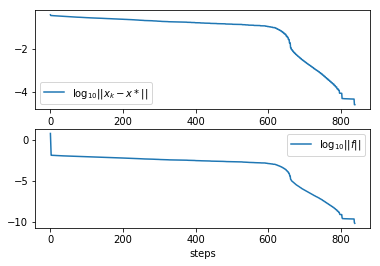

停止
ステップ数:789
x: [0.9999899006021918 0.9999797726550272]
勾配ベクトルの値: [-4.738410000433182e-06 -5.730270857817065e-06]


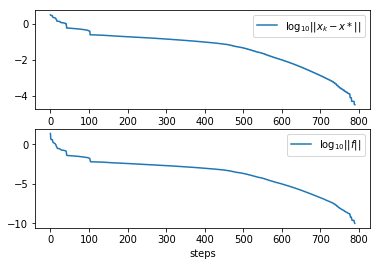

In [565]:
def main():
    # 勾配法を使って関数 fの最小値を探す
    doOpPlot(f,  gradient_descent, np.array([[1.2], [1.2]]),1000, "./figure/gradient_descent1.jpg")
    doOpPlot(f, gradient_descent, np.array([[-1.2], [1]]),1000, "./figure/gradient_descent2.jpg")
    
    
if __name__ == '__main__':
    main()

## Newton法

### ヘッセ行列をとる

In [512]:
def numerical_diff_second(f, x, i, j):
    """2階偏微分をする"""
    
    # 丸め誤差で無視されない程度に小さな値を用意する
    h = 10**(-4)
    
    # 偏微分する変数のインデックスにだけ上記の値を入れる
    hi_vec = np.zeros_like(x)
    hi_vec[i] = h
    hj_vec = np.zeros_like(x)
    hj_vec[j] = h

    
    # 数値微分を使って偏微分する
    return (f(x + hi_vec + hj_vec) - f(x - hi_vec + hj_vec) - f(x + hi_vec - hj_vec) + f(x - hi_vec - hj_vec)) / ((2*h)**2)
    

def numerical_hessian(f, x):
    """ヘッセ行列を計算する関数"""
    # 勾配を入れるベクトルをゼロで初期化する
    x_size = np.shape(x)[0]
    Hes = np.zeros((x_size, x_size))

    for i, _ in enumerate(x):
        for j, _ in enumerate(x):
            # i ,j番目の変数で勾配ベクトルを偏微分する
            Hes[i, j] = numerical_diff_second(f, x, i, j)
            if (i != j):
                Hes[j, i] = Hes[i, j]
        
    # 計算した勾配を返す
    return Hes

#### テスト

In [202]:
def testf(x):
    return x[0]**2 + x[1]**2

test_x = np.array([1.0, 1.0])
# numerical_diff_second(testf, test_x, 0, 0 )
numerical_hessian(testf, test_x)

array([[1.99999999e+00, 5.55111512e-09],
       [5.55111512e-09, 1.99999999e+00]])

### Newton法

In [551]:
def newton(f, initial_position, steps = 30):
    """ニュートン法で、最適解を得る"""
    
    # 現在地を示すカーソル
    _x = initial_position
    
    # 停止条件
    eps = 10**(-5)
    
    # 返り値
    x_list = []
    f_list = []

    # 学習を繰り返す
    for i in range(steps):
        x_list.append(np.copy(_x))
        f_list.append(f(_x))
        
        # 現在地の勾配 (どちらにどれだけ進むべきか) 
        grad =  numerical_gradient(f, _x)
        
        # 停止条件
        if (np.linalg.norm(grad) < eps):
            print("停止")
            print("ステップ数:"+str(i))
            print("x: ["+ str(_x[0][0])+" "+str(_x[1][0])+"]")
            print("勾配ベクトルの値: ["+ str(-d[0][0])+" "+str(-d[1][0])+"]")
            return [x_list, f_list]
        
        # 停止しないときの処理
        else:
            # ヘッセ行列を得る
            Hessian = numerical_hessian(f ,_x)
            d = - np.linalg.solve(Hessian, grad)
            
            # 勾配を元にして現在地を移動する
            _x = _x +  d
            
            
    # 最終的な位置を返す
    x_list.append(_x)
    print("妥協")
    print("x: ["+ str(_x[0][0])+" "+str(_x[1][0])+"]")
    print("勾配ベクトルの値: ["+ str(-d[0][0])+" "+str(-d[1][0])+"]")
    return  [x_list, f_list]

停止
ステップ数:5
x: [0.9999980000041132 0.9999960000122264]
勾配ベクトルの値: [1.8067041295445566e-09 -3.276508856294073e-07]


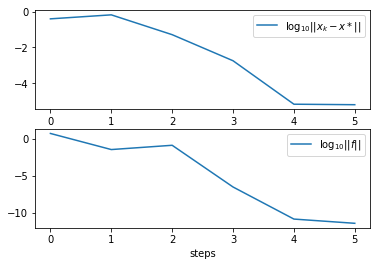

停止
ステップ数:6
x: [0.9999979999860513 0.9999959998957382]
勾配ベクトルの値: [-8.96462398878321e-06 -1.7929052092526267e-05]


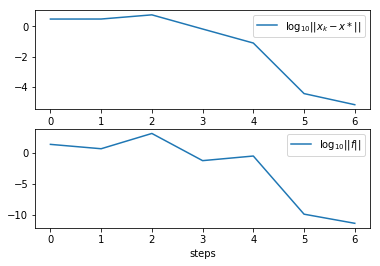

In [564]:
def main():
    # Newton法を使って関数 f() の最小値を探す
    doOpPlot(f,  newton, np.array([[1.2], [1.2]]),100, "./figure/newton1.jpg")
    doOpPlot(f,  newton, np.array([[-1.2], [1]]), 100, "./figure/newton2.jpg")
    
    
if __name__ == '__main__':
    main()

## 準Newton法

In [554]:
def quasi_newton(f, initial_position, steps = 100, H_0 = None):
    """準ニュートン法で、最適解を得る"""
    
    # 現在地を示すカーソル
    _x = initial_position
    
    # 停止条件
    eps = 10**(-5)
    
    # 返り値
    x_list = []
    f_list = []
    
    # 近似ヘッセ行列の逆行列の初期値
    if H_0 is None:
        Hessian_inv = np.eye(np.shape(_x)[0])
    else:
        Hessian_inv = H_0

    # 前のxの値と、その勾配を記録する変数の初期値Noneを与える
    _x_old = None
    grad_old = None
    
    # 学習を繰り返す
    for k in range(steps):
        # 結果を格納
        x_list.append(np.copy(_x))
        f_list.append(f(_x))
        
        #  勾配を得る
        grad = numerical_gradient(f, _x)
        
        # 停止条件
        if (np.linalg.norm(grad) < eps):
            print("停止")
            print("ステップ数:"+str(k))
            print("x: ["+ str(_x[0][0])+" "+str(_x[1][0])+"]")
            print("勾配ベクトルの値: ["+ str(-d[0][0])+" "+str(-d[1][0])+"]")
            return [x_list, f_list]
            
        else:
            # ループの2回目以降は近似ヘシアンを計算
            if ( _x_old is not None ):
                Hessian_inv = numerical_approximate_hessian_inv(Hessian_inv ,_x_old, _x, grad_old, grad)
                
            # 準Newton方向を得る
            d = - np.dot(Hessian_inv, grad)
            
            # 直線探索
            alpha = liner_search(f, _x, d, grad)
            
            # 次ループで用いる値の保持
            grad_old = grad
            _x_old = _x
            
            # 更新
            _x = _x +  alpha * d
            
            
    # 最終的な位置を返す
    x_list.append(_x)
    print(str(steps)+"回で収束しなかった")
    print("x: ["+ str(_x[0][0])+" "+str(_x[1][0])+"]")
    print("勾配ベクトルの値: ["+ str(-d[0][0])+" "+str(-d[1][0])+"]")
    return  [x_list, f_list]

def numerical_approximate_hessian(B_old, x_old, x_new, grad_old, grad_new):
    """新しい近似ヘッセ行列を作る。
        BFGS公式を用いる。"""
    
    sk = x_new- x_old
    yk = grad_new - grad_old
    timesB_and_s = np.dot(B_old, sk)
    return B_old - (np.dot(timesB_and_s, timesB_and_s.T) / np.dot(sk.T, timesB_and_s) ) + (np.dot(yk, yk.T) / np.dot(sk.T, yk) )

def numerical_approximate_hessian_inv(H_old, x_old, x_new, grad_old, grad_new):
    """新しい近似ヘッセ行列の逆行列を作る。
        BFGS公式のH公式を用いる。"""
    
    sk = x_new - x_old
    yk = grad_new - grad_old
    I = np.identity(np.shape(H_old)[0])
    
    # 公式に用いる行列やノルムを先に計算
    times_yk_sk_norm = np.dot(yk.T, sk)
    left_mat = I - (np.dot(sk , yk.T)/times_yk_sk_norm)
    right_mat = I - (np.dot(yk , sk.T)/ times_yk_sk_norm)
    
    # BFGSのH公式
    return np.dot(np.dot(left_mat, H_old), right_mat) + np.dot(sk, sk.T)/times_yk_sk_norm

停止
ステップ数:14
x: [1.0000021991771009 1.0000044296971067]
勾配ベクトルの値: [7.112594150700993e-06 1.4278742868339772e-05]


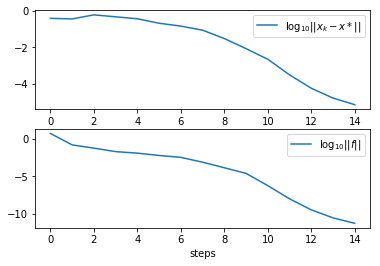

停止
ステップ数:32
x: [0.9999979996207111 0.9999959993486077]
勾配ベクトルの値: [-6.017352003861152e-08 -1.4363473664178881e-07]


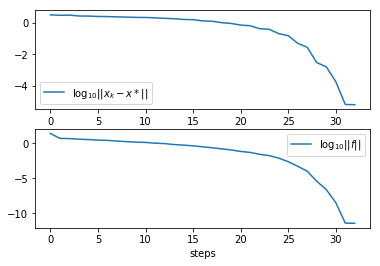

In [568]:
def main():
    # Newton法を使って関数 f() の最小値を探す
    doOpPlot(f,  quasi_newton, np.array([[1.2], [1.2]]),100, "./figure/quasi_newton1.jpg")
    doOpPlot(f,  quasi_newton, np.array([[-1.2], [1]]), 100, "./figure/quasi_newton2.jpg")
    
    
if __name__ == '__main__':
    main()

## Scipyのライブラリを使ってみる

In [432]:
from scipy.optimize import fmin

banana = lambda X, a: 100*(X[1] - X[0]**2)**2 + (a - X[0])**2
a = 1
arg = (a, )
fmin(banana, [1.2, 1.2], args=arg)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 43
         Function evaluations: 82


array([0.999993  , 0.99998474])

### 可視化

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 43
         Function evaluations: 82


array([0.999993  , 0.99998474])

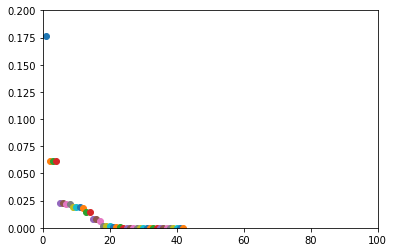

In [436]:
from scipy.optimize import fmin
import matplotlib.pyplot as plt

count = 0
plt.axis([0, 100, 0, 0.2])
plt.ion()

def cbf(Xi):
    global count
    count += 1
    f = banana(Xi, 1)
#     print('%d, %f, %f, %f' % (count, Xi[0], Xi[1], f))
    plt.scatter(count, f)

banana = lambda X, a: 100*(X[1] - X[0]**2)**2 + (a - X[0])**2
a = 1
arg = (a, )
fmin(banana, [1.2, 1.2], args=arg, callback=cbf)

      fun: 4.132123344673743e-15
 hess_inv: array([[0.49944859, 0.99867097],
       [0.99867097, 2.0017142 ]])
      jac: array([-2.52051180e-06,  1.27018924e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 11
     njev: 15
   status: 0
  success: True
        x: array([1.00000001, 1.00000003])


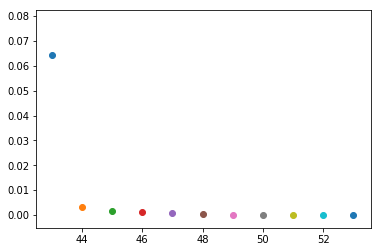

In [441]:
import numpy as np
from scipy.optimize import minimize


def objectFunc(x):
    """xは[2,1]のndarray型"""
    return 100*(x[1]-x[0]**2)**2 + (1-x[0])**2

def gradient(x):
    # 勾配ベクトル
    g = np.array([-400*x[0]*(x[1]-x[0]**2)-2*(1-x[0]), 200*(x[1]-x[0]**2)])
    return g



x0 = [1.2, 1.2]
res = minimize(objectFunc, x0, jac=gradient, method="bfgs", callback=cbf)
print(res)